In [74]:
import pandas as pd
import sklearn as sk
from scipy.stats import skew
import numpy as np

train = pd.read_csv(r"C:\Users\lenovo\Google Drive\PHAP\2IS\Machine Learning\Term project 2018\Term project\Aggregated data\depression_train.csv")
test = pd.read_csv(r"C:\Users\lenovo\Google Drive\PHAP\2IS\Machine Learning\Term project 2018\Term project\Aggregated data\depression_test_chunk1.csv")


print(train.shape)
print(test.shape)

(887, 258)
(820, 258)


In [75]:
sum_null = train.isnull().sum().sort_values(ascending=False)
sum_null.head()

class                    0
empath_love              0
empath_disappointment    0
empath_smell             0
empath_wedding           0
dtype: int64

In [76]:
train.dtypes.unique()

array([dtype('O'), dtype('float64'), dtype('int64')], dtype=object)

In [77]:
train.head()

,uid,unigram_im_frequency,unigram_like_frequency,unigram_people_frequency,unigram_know_frequency,unigram_time_frequency,unigram_really_frequency,unigram_ive_frequency,unigram_even_frequency,unigram_much_frequency,...,empath_clothing,empath_anticipation,empath_real_estate,empath_deception,empath_beach,empath_animal,empath_independence,empath_wealthy,empath_neglect,class
0,train_subject750,0.007910,0.008789,0.007910,0.000659,0.004175,0.007471,0.002417,0.003735,0.005713,...,0.000661,0.000220,0.001543,0.000771,0.000110,0.000331,0.000441,0.000992,0.000220,n
1,train_subject6670,0.007466,0.010540,0.000000,0.002196,0.006148,0.001757,0.002196,0.003513,0.000878,...,0.000889,0.000000,0.001557,0.000667,0.000889,0.003113,0.000000,0.001334,0.000000,n
2,test_subject7878,0.007163,0.006786,0.004618,0.004147,0.005372,0.001979,0.004713,0.002828,0.003110,...,0.000744,0.000093,0.001813,0.000465,0.000279,0.000604,0.000139,0.001023,0.000232,n
3,test_subject6167,0.000000,0.009381,0.003752,0.001876,0.003752,0.000000,0.000000,0.000000,0.001876,...,0.000000,0.000887,0.000000,0.002662,0.000000,0.000000,0.000000,0.000000,0.000000,n
4,train_subject9063,0.010094,0.006057,0.005384,0.003365,0.008075,0.002692,0.004038,0.000673,0.003365,...,0.000328,0.000655,0.002620,0.000983,0.000000,0.000328,0.000000,0.000983,0.000328,n


In [78]:
Obj_df = train.select_dtypes(exclude = [np.number])
numeric_df = train.select_dtypes(include = [np.number])
print (Obj_df.columns)
print (numeric_df.columns)

Index(['uid', 'class'], dtype='object')
Index(['unigram_im_frequency', 'unigram_like_frequency',
       'unigram_people_frequency', 'unigram_know_frequency',
       'unigram_time_frequency', 'unigram_really_frequency',
       'unigram_ive_frequency', 'unigram_even_frequency',
       'unigram_much_frequency', 'unigram_feel_frequency',
       ...
       'empath_weakness', 'empath_clothing', 'empath_anticipation',
       'empath_real_estate', 'empath_deception', 'empath_beach',
       'empath_animal', 'empath_independence', 'empath_wealthy',
       'empath_neglect'],
      dtype='object', length=256)


In [79]:
target = train.iloc[:,-1]
target = target.replace({"p":1,"n":0})

print (target.value_counts())
#==> Imbalanced target

0    752
1    135
Name: class, dtype: int64


In [80]:
train = train.drop(["uid","class"],axis=1)

In [81]:
target_test_data = test.iloc[:,-1]
target_test_data = target_test_data.replace({"p":1,"n":0})

In [82]:
training_test_data = test.drop(["uid", "class"],axis=1)
%store training_test_data
%store target_test_data

Stored 'training_test_data' (DataFrame)
Stored 'target_test_data' (Series)


### Consider the correlation among features 

In [83]:
corr = train.corr()
# stack into level 0 and 1 
corr = corr.abs().stack().reset_index()
# only consider the different names 
corr = corr[corr["level_0"].astype(str) != corr["level_1"].astype(str)]

corr['ordered-cols'] = corr.apply(lambda x: '-'.join(sorted([x['level_0'],x['level_1']])),axis=1)


In [84]:
corr = corr.drop_duplicates(['ordered-cols'])

In [85]:
print (corr.columns)

Index(['level_0', 'level_1', 0, 'ordered-cols'], dtype='object')


In [86]:
corr1 = corr[corr[0] > 0.6]

In [87]:
print(len(corr1["level_1"].unique()))

95


=> There are 50 features relatively correlated

### Consider skewness

In [88]:
count = 0
for c in numeric_df :
    if (skew(numeric_df[c]) > 0.8):
        #print (c, " : ", sk )
        count = count + 1

print (count)
#==> Almost skewed: 249 out of 258 

249


In [89]:
from sklearn.decomposition import PCA

pca1 = PCA(200)
train_pca = pca1.fit_transform(train)
train = train_pca
print (train.shape)

(887, 200)


In [90]:
#Scale
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

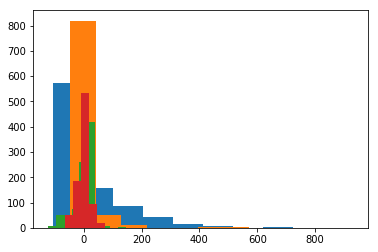

In [92]:
%matplotlib inline
for i in range (4):
    plt.hist(train[:,i],histtype="bar")

In [93]:
scaler = MinMaxScaler()
train = scaler.fit_transform(train)
%store train

Stored 'train' (ndarray)


In [94]:
## Classification
from sklearn import neighbors, tree
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.model_selection import cross_val_predict, cross_val_score
from imblearn.over_sampling import SMOTE
from sklearn import metrics
from sklearn.metrics import confusion_matrix, recall_score, f1_score, classification_report, roc_auc_score, roc_curve

In [95]:
print (train.shape)
print (target.shape)

(887, 200)
(887,)


### Using SMOTE to deal with unbalanced data 

In [96]:
sm = SMOTE(random_state=40)

In [97]:
#logistic
print ("before_train:", train.shape)
print ("before_test:", target.shape)
train, target = sm.fit_sample(train,target)
X_train,X_test,y_train,y_test = train_test_split(train,target,test_size=0.3)
print ("af_train:", train.shape)
print ("af_test_lb1:", sum(target==1))
print ("af_test_lb0:", sum(target==0))

before_train: (887, 200)
before_test: (887,)
af_train: (1504, 200)
af_test_lb1: 752
af_test_lb0: 752


## Fit with Logistic Regression

In [98]:
param = {'C':np.linspace(1,10,10)}
lg = LogisticRegression(solver = 'liblinear')
gridSearch = GridSearchCV(lg,param,cv=5,verbose=5,n_jobs=3)
gridSearch.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  12 tasks      | elapsed:    6.6s
[Parallel(n_jobs=3)]: Done  45 out of  50 | elapsed:    7.6s remaining:    0.8s
[Parallel(n_jobs=3)]: Done  50 out of  50 | elapsed:    7.7s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=3,
       param_grid={'C': array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=5)

In [99]:
gridSearch.best_params_

{'C': 8.0}

In [100]:
#from sklearn.model_selection import cross_val_predict, cross_val_score, KFold

#kf = KFold(n_splits=10)

lg = LogisticRegression (C=8,penalty='l1',solver = 'liblinear')

# Apply cross validation
lg = GridSearchCV(lg,param,cv=10)
lg.fit(X_train,y_train)
predict = lg.predict(X_test)


Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  12 tasks      | elapsed:    5.5s
[Parallel(n_jobs=3)]: Done  66 tasks      | elapsed:   30.5s
[Parallel(n_jobs=3)]: Done 100 out of 100 | elapsed:  1.1min finished


[LibLinear]

In [102]:
class_names = ["not_stress","stress"]

cm = confusion_matrix(y_test,predict)
df_cm = pd.DataFrame(cm,index=class_names,columns=class_names)
print ("Confusion matrix:")
df_cm.head()

Confusion matrix:


,not_stress,stress
not_stress,198,41
stress,7,206


In [103]:
from sklearn.metrics import accuracy_score

recall = recall_score(y_test,predict)
print ("recall:", recall)
#Accuracy 
accuracy = accuracy_score(y_test,predict)
print ("accuracy:",accuracy)
#f1 score 
f1_sc = f1_score(y_test,predict)
print ("f1_sc:", f1_sc)
auc = metrics.roc_auc_score(y_test,predict)
print("auc:", auc)

recall: 0.9671361502347418
accuracy: 0.8938053097345132
f1_sc: 0.8956521739130435
auc: 0.8977940165399652


#### Draw the ROC

In [29]:
y_probabilities =lg.predict_proba(X_test)
#position in the matrix: class 0,1
print(y_probabilities[:5,])
y_proba = y_probabilities[:,1]

[[1.60214448e-02 9.83978555e-01]
 [2.39749537e-04 9.99760250e-01]
 [9.68244035e-01 3.17559654e-02]
 [1.24469076e-03 9.98755309e-01]
 [3.33099757e-03 9.96669002e-01]]


In [30]:
print(y_probabilities.shape)

(452, 2)


In [31]:
fpr, tpr, thresholds = metrics.roc_curve(y_test,y_proba)

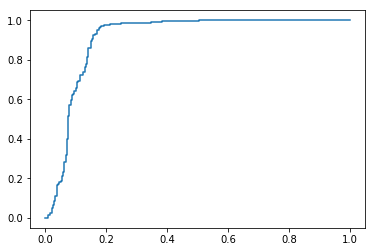

In [32]:
%matplotlib inline
plt.plot(fpr,tpr,label='auc:'+str(auc))
plt.show()

### Fit with LigthGBM

In [33]:
#LightGBM
from sklearn.preprocessing import LabelBinarizer
import lightgbm

In [34]:
param = {'objective': "binary",
              'num_leaves': 2**8,
              'learning_rate': 0.1,
              'is_unbalance': True,
              'min_split_gain': 0.1,
              'min_child_weight': 1,
              'reg_lambda': 1,
              'subsample': 1,
              'task': 'train'
              }
num_rounds = 300

In [35]:
train_data = lightgbm.Dataset(X_train,label=y_train)
test_data = lightgbm.Dataset(X_test,label=y_test)

lgbm = lightgbm.train(param, train_data,valid_sets=test_data,num_boost_round=num_rounds)

[1]	valid_0's binary_logloss: 0.643064
[2]	valid_0's binary_logloss: 0.598205
[3]	valid_0's binary_logloss: 0.566381
[4]	valid_0's binary_logloss: 0.532958
[5]	valid_0's binary_logloss: 0.506322
[6]	valid_0's binary_logloss: 0.48123
[7]	valid_0's binary_logloss: 0.460421
[8]	valid_0's binary_logloss: 0.43934
[9]	valid_0's binary_logloss: 0.422246
[10]	valid_0's binary_logloss: 0.406119
[11]	valid_0's binary_logloss: 0.392626
[12]	valid_0's binary_logloss: 0.378053
[13]	valid_0's binary_logloss: 0.367621
[14]	valid_0's binary_logloss: 0.353579
[15]	valid_0's binary_logloss: 0.342972
[16]	valid_0's binary_logloss: 0.331023
[17]	valid_0's binary_logloss: 0.320706
[18]	valid_0's binary_logloss: 0.311199
[19]	valid_0's binary_logloss: 0.302646
[20]	valid_0's binary_logloss: 0.293731
[21]	valid_0's binary_logloss: 0.285894
[22]	valid_0's binary_logloss: 0.280316
[23]	valid_0's binary_logloss: 0.273618
[24]	valid_0's binary_logloss: 0.266098
[25]	valid_0's binary_logloss: 0.259696
[26]	valid_

In [36]:
y_predict_proba = lgbm.predict(X_test)
y_predict = np.where(y_predict_proba > 0.5,1,0)

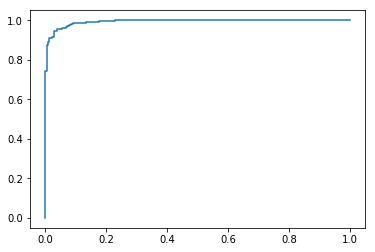

In [37]:
fpr,tpr,threshores = metrics.roc_curve(y_test,y_predict_proba)
plt.plot(fpr,tpr,label="lightgbm_roc")

In [38]:
from sklearn.metrics import accuracy_score

print("recall: ", recall_score(y_test,y_predict))
print("auc:", metrics.roc_auc_score(y_test,y_predict))
print("accuracy: ", accuracy_score(y_test,y_predict))

recall:  0.9669811320754716
auc: 0.9501572327044024
accuracy:  0.9491150442477876


In [40]:
# Compare the correlation between target and prediction to verify the prediction 
from scipy.stats.stats import pearsonr   
print (pearsonr(y_test,y_predict))

(0.8988053577466661, 2.7525892753357492e-163)


## Test 
- Chunk 1

In [57]:
%store -r training_test_data
%store -r target_test_data

#### With PCA and scaler

In [106]:
#SMOTE
X_test,y_test = sm.fit_sample(training_test_data,target_test_data)

#PCA
X_test = pca1.fit_transform(X_test)

#Scaler 
X_test = scaler.fit_transform(X_test)

### Logistic Regression

In [128]:
y_predict = lg.predict(X_test)

In [129]:
print("recall: ", recall_score(y_test,y_predict))
print("auc:", metrics.roc_auc_score(y_test,y_predict))
print("accuracy: ", accuracy_score(y_test,y_predict))

recall:  0.8475033738191633
auc: 0.5458839406207827
accuracy:  0.5458839406207827


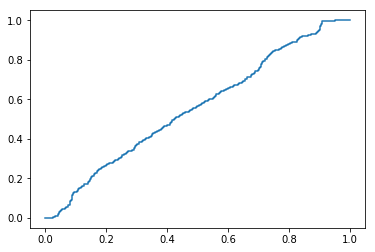

In [132]:
y_predict_proba = lg.predict_proba(X_test)[:,1]
fpr,tpr,threshore = metrics.roc_curve(y_test,y_predict_proba)
plt.plot(fpr,tpr)

In [123]:
print(pearsonr(y_test,y_predict))

(0.1150607040649326, 8.975809479368567e-06)


### LightGBM

In [133]:
y_predict_proba = lgbm.predict(X_test)
y_predict = np.where(y_predict_proba > 0.5,1,0)

In [134]:
print("recall: ", recall_score(y_test,y_predict))
print("auc:", metrics.roc_auc_score(y_test,y_predict))
print("accuracy: ", accuracy_score(y_test,y_predict))

recall:  0.32793522267206476
auc: 0.5330634278002699
accuracy:  0.5330634278002699


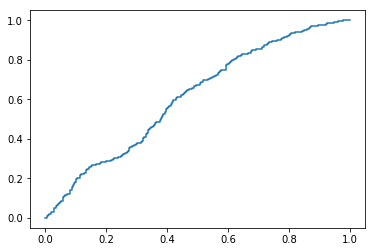

In [135]:
fpr,tpr,threshore = metrics.roc_curve(y_test,y_predict_proba)
plt.plot(fpr,tpr)

- Issue: Looks like overfit (Or consider the population of train and test set) ==> Futher study in features selection
- LightGBM seems better 